<center>
    <h1> INF393 - Maquinas de Aprendizaje  </h1>
    <h2> Tarea 2: Métodos Lineales para Clasificación </h2>
    <h5> Alumnos: Ignacio Espinoza & Daniel Rivera</h5>
</center>

<h2> PARTE 1:  Vowel's Dataframe </h2>

<p>El dataset a analizar está constituido por las once vocales (acorde a <i>International Phonetic Association</i> reconocidas por el Inglés Britanico. Cada palabra fue pronunciada una vez por cada uno de los 15 participantes. 4 participantes de sexo masculino y 4 participantes del sexo femenion fueron usados para el set de entrenamiento, el cual posee 528 datos, mientras que los 4 hombres y 3 mujeres restantes fueron usados en el set de testing, con 462 datos. </p>

<p>Cada uno de los participantes registró 6 veces cada una de las 11 palabras usadas para cada vocal.Las vocales estudiadas y las palabras usadas para cada vocal son las siguientes</p>


<table style="width:65%">
    <tr>
        <th>Vocal</th>
        <th>Palabra</th>
        <th>Vocal</th>
        <th>Palabra</th>
    </tr>
      <tr>
        <td>i</td>
        <td>heed</td>
        <td>O</td>
        <td>hod</td>
    </tr>
    <tr>
        <td>I</td>
        <td>hid</td>
        <td>C:</td>
        <td>hoard</td>
    </tr>
    <tr>
        <td>E</td>
        <td>head</td>
        <td>U</td>
        <td>hood</td>
    </tr>
    <tr>
        <td>A</td>
        <td>had</td>
        <td>u:</td>
        <td>who'd</td>
    </tr>
    <tr>
        <td>a:</td>
        <td>hard</td>
        <td>3:</td>
        <td>heard</td>
    </tr>
    <tr>
        <td>Y</td>
        <td>hud</td>
        <td></td>
        <td></td>
    </tr>
</table>


<p>Las señales de voz registradas fueron pasadas a $4.7[kHz]$ y digitalizadas a 12 bits con un sampling de $10[khz]$. Para este caso fue usado el coeficiente de reflección para calcular el $log_{10}$ de los parametros, de mod oque cada registro vocal es un input de dimensionalidad 10. El <b>Coeficiente de reflección </b> representa la fracción de energia reflejada en cada sección de una modelo no uniforme de registro vocal</p>



In [3]:
%matplotlib inline
import urllib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.lda import LDA
from sklearn.qda import QDA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy


train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"


<h2>Principal Component Analysis (PCA)</h2>

<p>Para implementar el algoritmo , es necesario primero construir el dataframe, por lo que es necesario  se genera la matriz $X$ e $y$ correspondiente y escalar los datos:</p>

In [5]:
def get_data(train_data_url,test_data_url):
   
   train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
   test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")

   train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
   test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

   train_df.head()
   test_df.tail()

   return train_df, test_df

def scale_data(train_df, test_df):
   X = train_df.ix[:,'x.1':'x.10'].values
   y = train_df.ix[:,'y'].values
   X_std = StandardScaler().fit_transform(X)

   return X_std, y

In [6]:
def get_PCA(X_std):
   sklearn_pca =  PCA( n_components = 2 )
   Xred_pca = sklearn_pca.fit_transform(X_std)
   
   cmap = plt.cm.get_cmap('Spectral')
   mclasses = (1,2,3,4,5,6,7,8,9,10,11)
   mcolors = [cmap(i) for i in np.linspace(0,1,11)]
   plt.figure(figsize=(12,8))
   
   for lab, col in zip(mclasses,mcolors):
      plt.scatter(Xred_pca[y == lab,0],Xred_pca[y == lab,1], s=40, label = lab, c = col)
   
   plt.xlabel('Componente 1')
   plt.ylabel('Componente 2')
   leg = plt.legend(loc = 'upper right', fancybox= True)
   plt.show()

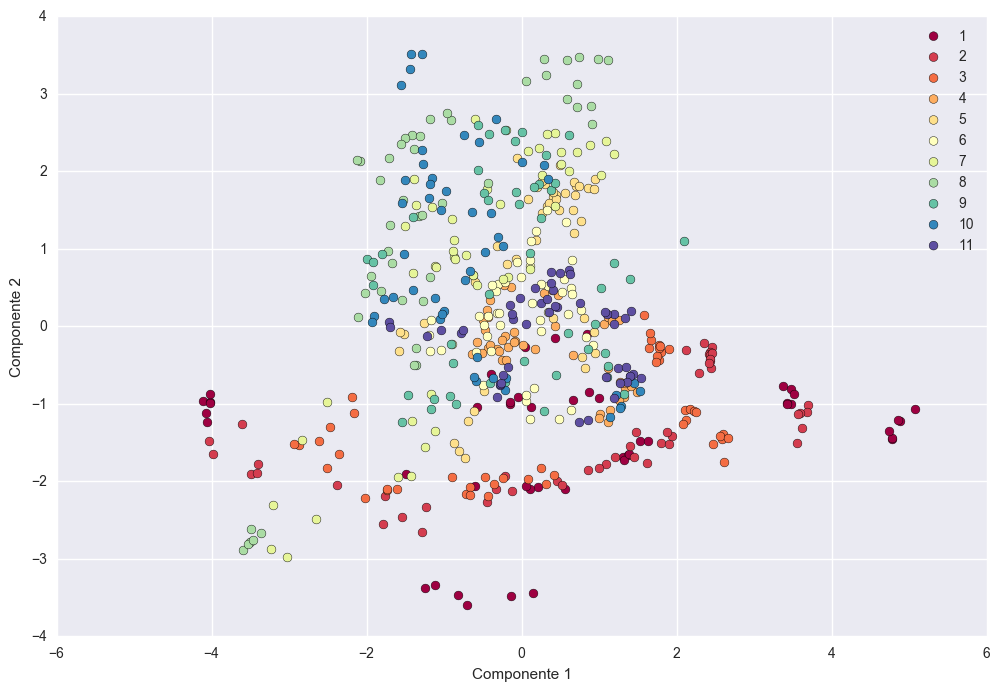

In [7]:
train_df , test_df = get_data(train_data_url,test_data_url)
X_std , y = scale_data(train_df, test_df)
get_PCA(X_std)

<h2>Linear Discriminant Analysis(LDA) </h2>

<p> Linear Discriminant Analysis es una generalización de la discriminación lineal de Fisher's y es usado frecuentemente en estadística, reconocimiento de patrones y maquinas de aprendizaje para encontrar combinación lineales de atributos que determinan o separan dos o más clases de objetos o eventos. El resultado es usado en este caso para una reducción de dimensionalidad para ser usado en la clasificación de las vocales

In [8]:
def get_LDA(X_std,y):
   sklearn_lda = LDA( n_components = 2 )
   Xred_lda = sklearn_lda.fit_transform( X_std , y )
    
   cmap = plt.cm.get_cmap('Accent')
   mclasses=(1,2,3,4,5,6,7,8,9,10,11)
   mcolors = [cmap(i) for i in np.linspace(0,1,11)]
   plt.figure(figsize=(12, 8))

   for lab, col in zip(mclasses,mcolors):
      plt.scatter(Xred_lda[y == lab, 0],Xred_lda[y == lab, 1],s = 40 , label = lab,c = col)

   plt.xlabel('LDA/Fisher Direction 1')
   plt.ylabel('LDA/Fisher Direction 2')
   leg = plt.legend(loc='upper right', fancybox=True)
   plt.show()

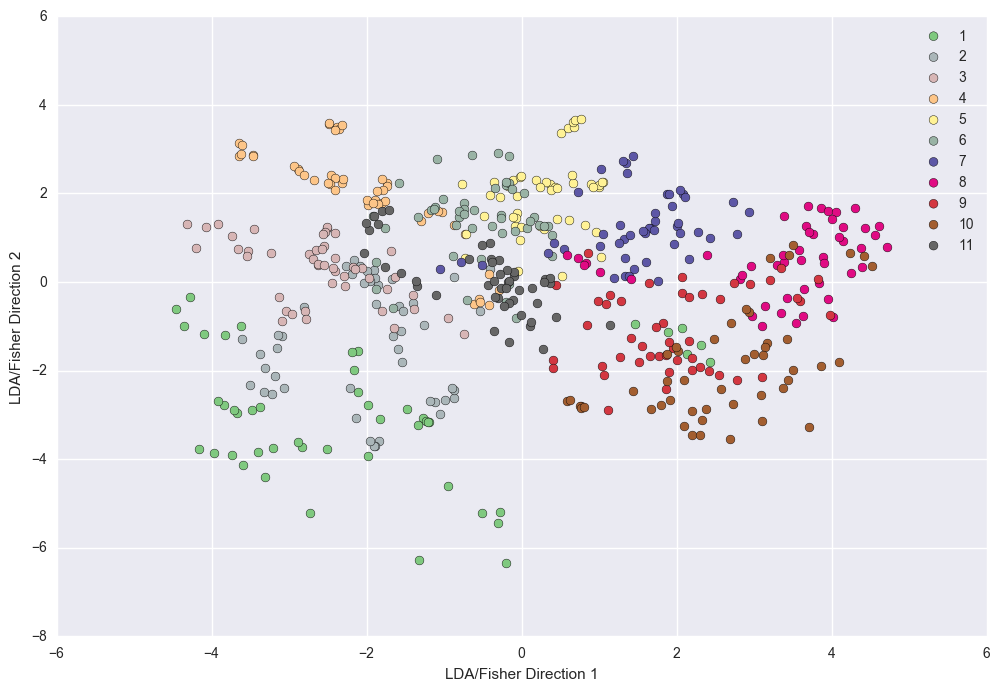

In [9]:
get_LDA(X_std,y)

<h4> (a) Compare cualitativamente los resultados obtenidos en 1 y 2. Proponga un método para elegir una técnica de reducción de dimensionalidad. </h4>


<p> La primera gran apreciación que se puede observar y analizar entre ambos gráficos es que en los resultados entregados de LDA , las clases se encuentran relativamente cerca espacialmente, de modo que es posible apreciar una pseudo clusterización de cada una de estas clases. Esto es debido principalmente a que dado que LDA es un método supervisado (se tiene a priori las clases) y el algoritmo trata de identificar los atributos que dan mayor peso a la varianza <i> entre clases. </i> </p> 

<p> Por otro lado, PCA hace caso omiso a las clases y toma los datos como "<i>un todo</i>", o sea el set de entrenamiento es tratado como si toda la data viene de la misma población, no existe un análisis entre la relación entre clases. </p>

<p>En general, PCA no posee buen rendimiento para problemas de clasificación múltiple, per existen excepciones en que el cambio de PCA a LDA no siempre garantiza mejor precisión y a veces conlleva a errores de diseño, especialmente en los casos en que la cantidad de datos de entrenamiento son relativamente pequeños</p>

<h4>(b) Construya un clasificador que determine la clase de un dato <i>x</i> aleatoriamente sin considerar las características sino que solamente la probabilidad <i>a-priori</i> de cada clase</h4>

<p>Es necesario analizar la distribución de clases en el set de entrenamiento. Existen 11 clases, dentro de las cuales, todas las clases se repiten 48 veces , de modo que todas las clases son equiprobables de aparecer con un $9,09\%$ de probabilidad.</p>

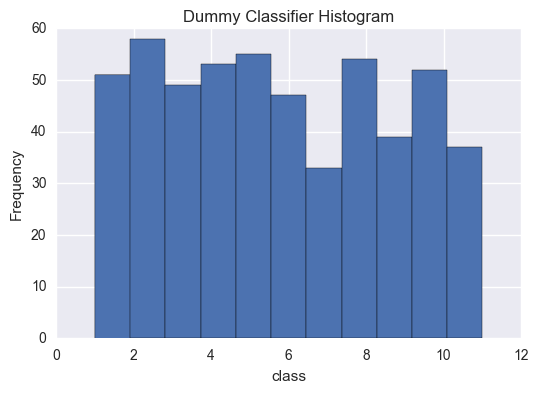

In [11]:
def get_Dummy(X_std,y):
   dummy = DummyClassifier(strategy='stratified', random_state = None, constant = None)
   model = dummy.fit(X_std,y)
   prediction = model.predict(X_std)
   prediction_prob = model.predict_proba(X_std)

   plt.hist( prediction, bins = 11 )
   plt.title("Dummy Classifier Histogram")
   plt.xlabel('class')
   plt.ylabel('Frequency')
   plt.show()

get_Dummy(X_std,y)

<h5>(c)Compare el desempeño de LDA, QDA y un modelo de Vecinos M ́
as Cercanos (k-NN)  sin reducir su dimensionalidad. ¿Qué técnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un grafico, el efecto de cambiar el parametro de k en el tercer modelo.</h5>

[KNN SCORE]
0.491341991342
[LDA SCORE]
0.452380952381
[QDA SCORE]
0.415584415584


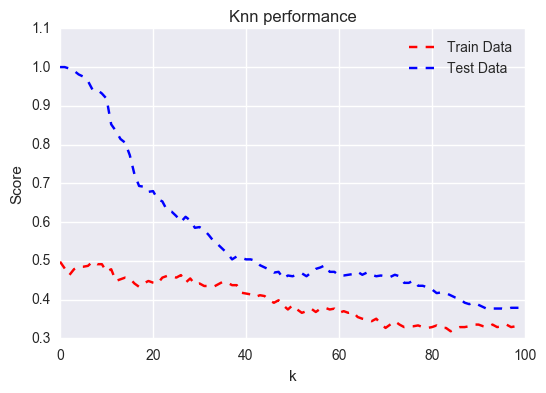

In [12]:
def get_performance(test_df,X_std,y):
   Xtest = test_df.ix[:,'x.1':'x.10'].values
   ytest = test_df.ix[:,'y'].values

   X_std_test = StandardScaler().fit_transform(Xtest)
   
   lda_model = LDA()
   lda_model.fit(X_std,y)
   
   qda_model = QDA()
   qda_model.fit(X_std,y)

   knn_model = KNeighborsClassifier(n_neighbors = 10)
   knn_model.fit(X_std,y)
   
   print "[KNN SCORE]"
   print knn_model.score(X_std_test,ytest)
   print "[LDA SCORE]"
   print lda_model.score(X_std_test,ytest)
   print "[QDA SCORE]"
   print qda_model.score(X_std_test,ytest)

   knn_scores_training = []
   knn_scores_test = []

   for i in range(1,101):
      knn_model = KNeighborsClassifier(n_neighbors = i)
      knn_model.fit(X_std,y)
      knn_scores_training.append(knn_model.score(X_std_test,ytest))
      knn_scores_test.append(knn_model.score(X_std,y))

   plt.plot(range(100),knn_scores_training,'r--')
   plt.plot(range(100),knn_scores_test,'b--')
   plt.axis([0,100,0.3,1.1])
   plt.xlabel('k')
   plt.ylabel('Score')
   plt.title('Knn performance')
   plt.legend(["Train Data","Test Data"])
   plt.show()

get_performance(test_df,X_std,y)

<p> De los 3 clasificadores, el knn tiene un mejor score, con un valor de 0.4913, esto se debe probablemente a que aquellos elementos que pertenecen a la misma clase se encuentran relativamente cercanos entre ellos, de modo que el algoritmo puede reconocer correctamente mas elementos que los otros algoritmos. </p>

<p> Si bien fue el mejor de los resultados entre los 3 algoritmos de clasificación, hay malos resultados cuando se implementa con el set de prueba, lo que revela que el modelo no genera un modelo predictivo óptimo para todos los casos </p>

<p> Se debe destacar que si bien una presición cercana al 50% puede considerarse como un mal modelo de predicción, esto se debe comparar con el modelo Dummy, el cual posee un 9% de predicción, por lo que hay un avance considerable comparad con un modelo completamente aleatorio </p>

<h5>(d) Utilice PCA para generar una representación de la data en d = 1, 2, 3, . . . , 10 dimensiones. Para cada
caso entrene un modelo LDA, QDA y de k-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus d . Sobreponga a este gráfico el error de pruebas versus d . Concluya</h5>

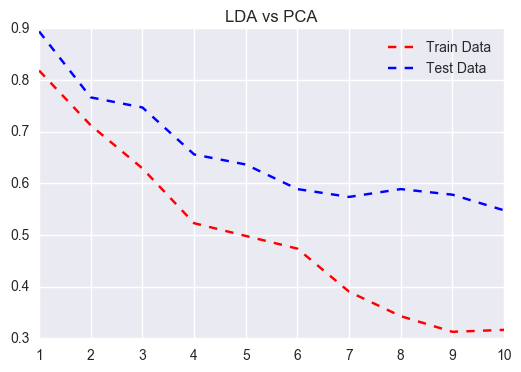

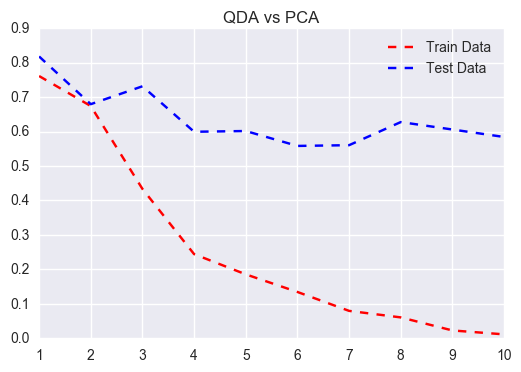

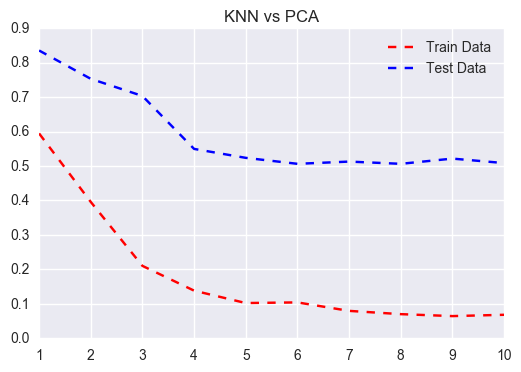

In [14]:
def get_PCA_performance(test_df,X_std,y):
   X_test = test_df.ix[:,'x.1':'x.10'].values
   y_test = test_df.ix[:,'y'].values
   X_std_test = StandardScaler().fit_transform(X_test)

   lda_scores_training = []
   lda_scores_test = []

   qda_scores_training = []
   qda_scores_test = []

   knn_scores_training = []
   knn_scores_test = []

   for d in range(1, 11):
      pca = PCA(n_components = d)
      Xred_pca_training = pca.fit_transform(X_std)
      Xred_pca_test = pca.transform(X_std_test)

      lda_model = LDA()
      lda_model.fit(Xred_pca_training , y)
       
      qda_model = QDA()
      qda_model.fit(Xred_pca_training , y)
       
      knn_model = KNeighborsClassifier(n_neighbors = 10)
      knn_model.fit(Xred_pca_training , y)

      lda_scores_training.append(1 - lda_model.score(Xred_pca_training ,y))
      lda_scores_test.append(1 - lda_model.score(Xred_pca_test,y_test))

      qda_scores_training.append(1 - qda_model.score(Xred_pca_training,y))
      qda_scores_test.append(1- qda_model.score(Xred_pca_test,y_test))

      knn_scores_training.append(1 - knn_model.score(Xred_pca_training,y))
      knn_scores_test.append(1 - knn_model.score(Xred_pca_test,y_test))

   plt.plot(range(1,11),lda_scores_training,'r--', label="Train data")
   plt.plot(range(1,11),lda_scores_test,'b--', label="Test data")
   plt.legend(["Train Data","Test Data"])
   plt.title("LDA vs PCA")
   plt.show()

   plt.plot(range(1,11),qda_scores_training,'r--', label="Train data")
   plt.plot(range(1,11),qda_scores_test,'b--', label="Test data" )
   plt.legend(["Train Data","Test Data"])
   
   plt.title("QDA vs PCA")
   plt.show()

   plt.plot(range(1,11),knn_scores_training,'r--', label="Train data")
   plt.plot(range(1,11),knn_scores_test,'b--', label="Test data")
   plt.legend(["Train Data","Test Data"])
   plt.title("KNN vs PCA")
   plt.show()

get_PCA_performance(test_df,X_std,y)

<p>Como se observa en los 3 gráficos, conforme se va reduciendo la dimensionalidad en los 3 problemas de clasificación, el error de entrenamiento se va reduciendo.En los 3 casos, el error del set de testing es siempre mayor al error de entrenamiento, la razón de este fenómeno es que al momento de calcular el error de entrenamiento se analizan los mismos datos con los que se entrena el modelo. De las 3 clasificaciones en el set de testing el mejor resultado se obtuvo con Knn con 5 dimensiones . En general PCA no otorga mejores resultados usarlo para reducción de dimensionalidad, principalmente porque PCA no trabaja bien en el ámbito de clasificación. </p>



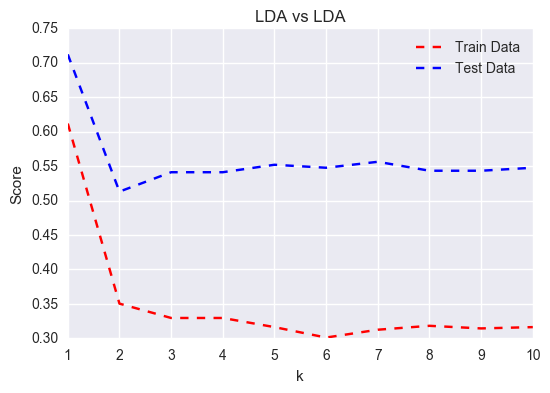

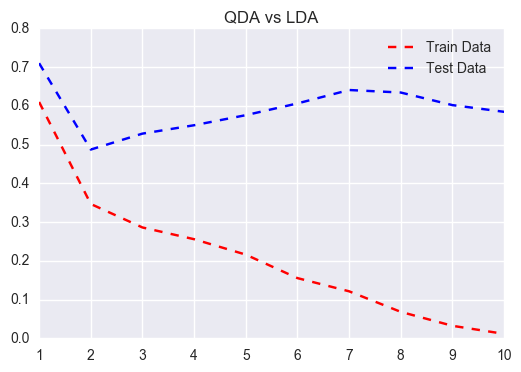

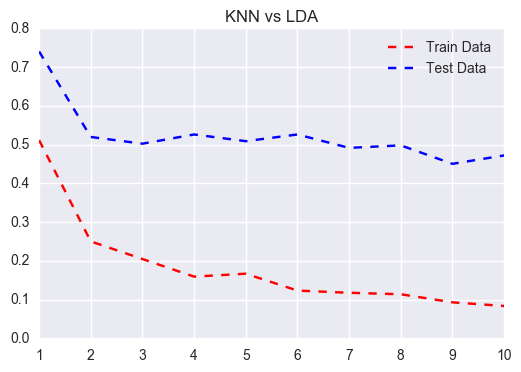

In [15]:
def get_LDA_performance(test_df,X_std,y):
   X_test = test_df.ix[:,'x.1':'x.10'].values
   X_std_test = StandardScaler().fit_transform(X_test)
   y_test = test_df.ix[:,'y'].values

   lda_scores_training = []
   lda_scores_test = []

   qda_scores_training = []
   qda_scores_test = []

   knn_scores_training = []
   knn_scores_test = []

   for d in range(1, 11):
      lda = LDA( n_components = d )
      Xred_lda_training = lda.fit_transform(X_std, y)
      Xred_lda_test = lda.transform(X_std_test)

      lda_model = LDA()
      lda_model.fit(Xred_lda_training , y)
       
      qda_model = QDA()
      qda_model.fit(Xred_lda_training , y)
       
      knn_model = KNeighborsClassifier(n_neighbors = 10)
      knn_model.fit(Xred_lda_training , y)

      lda_scores_training.append(1 - lda_model.score(Xred_lda_training ,y))
      lda_scores_test.append(1 - lda_model.score(Xred_lda_test,y_test))

      qda_scores_training.append(1 - qda_model.score(Xred_lda_training,y))
      qda_scores_test.append(1- qda_model.score(Xred_lda_test,y_test))

      knn_scores_training.append(1 - knn_model.score(Xred_lda_training,y))
      knn_scores_test.append(1 - knn_model.score(Xred_lda_test,y_test))

   plt.plot(range(1,11),lda_scores_training,'r--', label="Train data")
   plt.plot(range(1,11),lda_scores_test,'b--',label="Test data" )
   plt.title("LDA vs LDA")
   plt.xlabel('k')
   plt.ylabel('Score')
   plt.legend(["Train Data","Test Data"])
   plt.show()

   plt.plot(range(1,11),qda_scores_training,'r--', label="Train data")
   plt.plot(range(1,11),qda_scores_test,'b--', label="Test data")
   plt.title("QDA vs LDA")
   plt.legend(["Train Data","Test Data"])
   plt.show()

   plt.plot(range(1,11),knn_scores_training,'r--', label="Train data")
   plt.plot(range(1,11),knn_scores_test,'b--', label="Test data")
   plt.title("KNN vs LDA")
   plt.legend(["Train Data","Test Data"])
   plt.show()

get_LDA_performance(test_df,X_std,y)

<p>Al igual que en el ejercicio anterior, hay mayor error el set de prueba que en el set de entrenamiento, por el mismo fenómeno que al implementar PCA. A diferencia de PCA, se observa que al reducir dimensionalidad con LDA, si hay una mejora al momento de clasificar, con el mejor resultado en Quadratic Classifier (QDA) con dimensionalidad 1, se asume estos resultados dada la cercania que hay entre LDA y QDA, dado que estos asumen que las medidas de cada clase se encuentran normalmente distribuidas </p>